Data Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
col_names = ['HCHO_Amount','Location','Present_Date','Next_Date'] # Column names to be set for the df 

In [3]:
def neg_null(data_f, column): # Replaces (-)ve values with NaN
    data_f.loc[data_f[column] < 0, column] = np.nan # Checks the column for values less than 0 and replaces it with NaN
    return data_f

In [4]:
def replace(data_f):  # Replaces NaN values with the mean of the column
    mean_v = data_f['HCHO_Amount'].mean() 
    data_f = data_f.fillna(value={'HCHO_Amount': mean_v})
    return data_f 

In [5]:
def outliers(data_f, column): # Removes the outliers from the df
    mean = data_f[column].mean() # Mean
    std = data_f[column].std() # SD
    threshold = mean + (3 * std) # Threshold value to remove the outliers
    data_f = data_f[data_f[column] < threshold] # Removes the outliers
    return data_f
 

In [6]:
def dist_norm(data_f, column, color='lightblue'): # Ploting the distribution of the data
    plt.figure(figsize=(8,7))
    sns.histplot(data_f[column], kde=True, stat='density', color=color)
    sns.kdeplot(data_f[column], color='black', linestyle='-')
    plt.title(f"Normal Distribution Plot for {column} column.")
    plt.xlabel("HCHO Reading")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

In [7]:
def stat_analysis(data_f, column): # Statistical analysis of the data

    mean_d = data_f[column].mean()
    median_d = data_f[column].median()
    mode_d = data_f[column].mode()
    std_d = data_f[column].std()
    
    print(f"Mean: {mean_d}\nMedian: {median_d}\nMode: {mode_d[0]}\nStandard Deviation: {std_d}")

In [8]:
def box_plot(data_f, column, color='lightblue'): # Boxplot for the data to find the outliers
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data_f, y=column, color=color)
    plt.title(f"Boxplot for {column} Readings")
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

Colombo, Matara, Nuwara Eliya Data Frame

In [9]:
cmn_df = pd.read_csv('col_mat_nuw_output.csv', header=None) 
cmn_df.columns = col_names # Adding the column names to the data set
cmn_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [10]:
cmn_df.loc[cmn_df['Location'] == 'Colombo Proper', 'Location'] = "Colombo"
cmn_df.loc[cmn_df['Location'] == 'Deniyaya, Matara', 'Location'] = "Matara"
cmn_df.loc[cmn_df['Location'] == 'Nuwara Eliya Proper', 'Location'] = "Nuwara Eliya" # Converts the locations into a meaningful location name
cmn_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [11]:
cmn_df.dtypes # Checks the data types of the columns 

HCHO_Amount     float64
Location         object
Present_Date     object
Next_Date        object
dtype: object

In [12]:
cmn_df.size # Gives the size of the dataset 

21912

In [13]:
cmn_df['Present_Date'] = pd.to_datetime(cmn_df['Present_Date'])  # Converting the date columns into datetime format
cmn_df['Next_Date'] = pd.to_datetime(cmn_df['Next_Date'])
cmn_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

In [14]:
colo_df = cmn_df[cmn_df['Location'] == 'Colombo'] 
mata_df = cmn_df[cmn_df['Location'] == 'Matara']
nuwaE_df = cmn_df[cmn_df['Location'] == 'Nuwara Eliya'] # Creating dataframes for each location 

colo_df.reset_index(drop=True, inplace=True)
nuwaE_df.reset_index(drop=True, inplace=True)
mata_df.reset_index(drop=True, inplace=True) # Resetting the indexes of the dataframes


Matara Data Frame

In [15]:
mata_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,Matara,2019-01-01,2019-01-02
1,0.000006,Matara,2019-01-02,2019-01-03
2,0.000236,Matara,2019-01-03,2019-01-04
3,0.000064,Matara,2019-01-04,2019-01-05
4,0.000053,Matara,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000228,Matara,2023-12-27,2023-12-28
1822,NaN,Matara,2023-12-28,2023-12-29
1823,NaN,Matara,2023-12-29,2023-12-30
1824,0.000116,Matara,2023-12-30,2023-12-31


In [16]:
mata_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

Checking For Outliers 

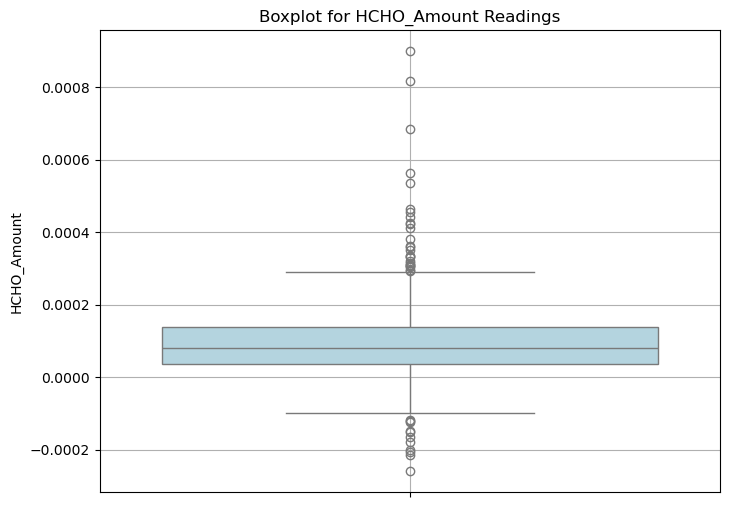

In [17]:
box_plot(mata_df, 'HCHO_Amount', color='lightblue')

In [18]:
# Convert the negative values to null values so that they can be replaced with the mean of the column later
mata_df = neg_null(mata_df, 'HCHO_Amount')
mata_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,Matara,2019-01-01,2019-01-02
1,0.000006,Matara,2019-01-02,2019-01-03
2,0.000236,Matara,2019-01-03,2019-01-04
3,0.000064,Matara,2019-01-04,2019-01-05
4,0.000053,Matara,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000228,Matara,2023-12-27,2023-12-28
1822,NaN,Matara,2023-12-28,2023-12-29
1823,NaN,Matara,2023-12-29,2023-12-30
1824,0.000116,Matara,2023-12-30,2023-12-31


In [19]:
mata_df.isnull().sum() # Checking for null values in the matara df

HCHO_Amount     962
Location          0
Present_Date      0
Next_Date         0
dtype: int64

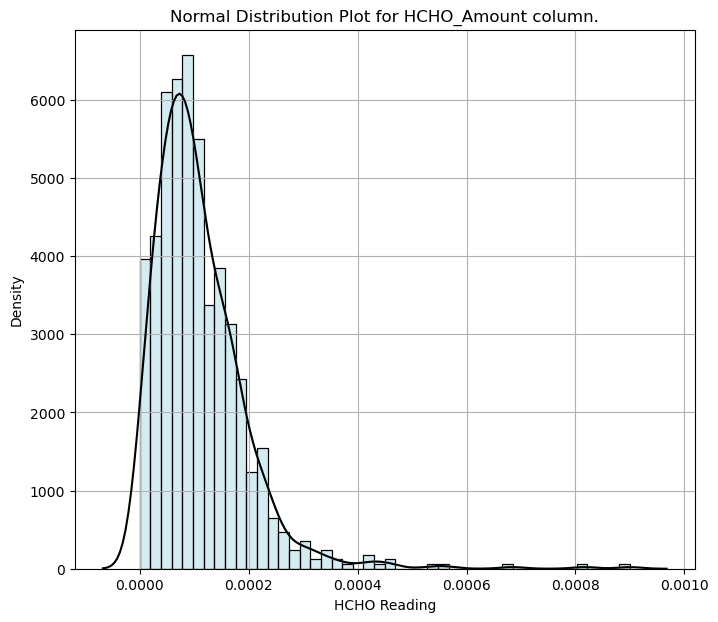

In [20]:
dist_norm(mata_df, 'HCHO_Amount', color='lightblue')

In [21]:
mata_df = outliers(mata_df, 'HCHO_Amount') # Removing the outliers from the data
mata_df.reset_index(drop=True, inplace=True) # Resetting the index of the dataframe
mata_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000006,Matara,2019-01-02,2019-01-03
1,0.000236,Matara,2019-01-03,2019-01-04
2,0.000064,Matara,2019-01-04,2019-01-05
3,0.000053,Matara,2019-01-05,2019-01-06
4,0.000132,Matara,2019-01-06,2019-01-07
...,...,...,...,...
847,0.000063,Matara,2023-12-24,2023-12-25
848,0.000072,Matara,2023-12-25,2023-12-26
849,0.000059,Matara,2023-12-26,2023-12-27
850,0.000228,Matara,2023-12-27,2023-12-28


In [22]:
mata_df = replace(mata_df) # Replacing the NaN values with the mean of the column
mata_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000006,Matara,2019-01-02,2019-01-03
1,0.000236,Matara,2019-01-03,2019-01-04
2,0.000064,Matara,2019-01-04,2019-01-05
3,0.000053,Matara,2019-01-05,2019-01-06
4,0.000132,Matara,2019-01-06,2019-01-07
...,...,...,...,...
847,0.000063,Matara,2023-12-24,2023-12-25
848,0.000072,Matara,2023-12-25,2023-12-26
849,0.000059,Matara,2023-12-26,2023-12-27
850,0.000228,Matara,2023-12-27,2023-12-28


In [23]:
mata_df.isnull().sum() 

HCHO_Amount     0
Location        0
Present_Date    0
Next_Date       0
dtype: int64

In [24]:
print("Statistical Analysis of HCHO Amount in Matara:")
stat_analysis(mata_df, 'HCHO_Amount') # Statistical analysis of the data

Statistical Analysis of HCHO Amount in Matara:
Mean: 0.00010367630192819211
Median: 9.08040764275311e-05
Mode: 8.48560045610269e-08
Standard Deviation: 6.806631826412409e-05


In [25]:
mata_df.to_csv('mata_cleaned.csv', index=False) 

Colombo Data Frame

In [26]:
colo_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo,2023-12-27,2023-12-28
1822,NaN,Colombo,2023-12-28,2023-12-29
1823,NaN,Colombo,2023-12-29,2023-12-30
1824,0.000140,Colombo,2023-12-30,2023-12-31


In [27]:
colo_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

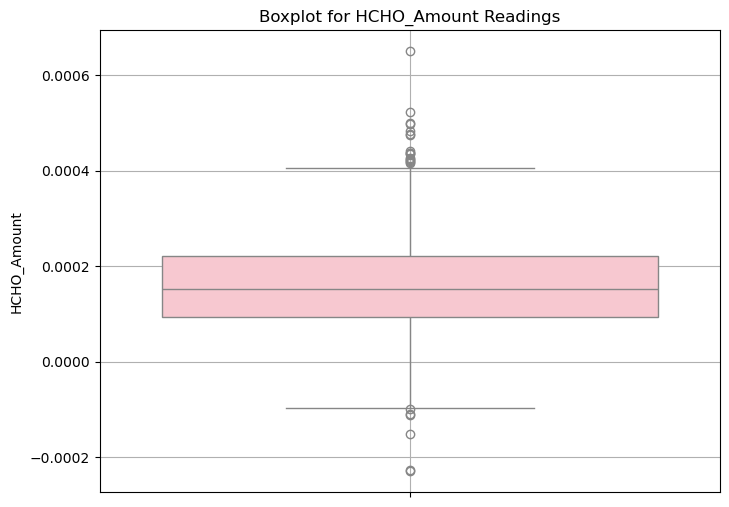

In [28]:
box_plot(colo_df, 'HCHO_Amount', color='pink')

In [29]:
colo_df = neg_null(colo_df, 'HCHO_Amount')
colo_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo,2023-12-27,2023-12-28
1822,NaN,Colombo,2023-12-28,2023-12-29
1823,NaN,Colombo,2023-12-29,2023-12-30
1824,0.000140,Colombo,2023-12-30,2023-12-31


In [30]:
colo_df.isnull().sum() 

HCHO_Amount     539
Location          0
Present_Date      0
Next_Date         0
dtype: int64

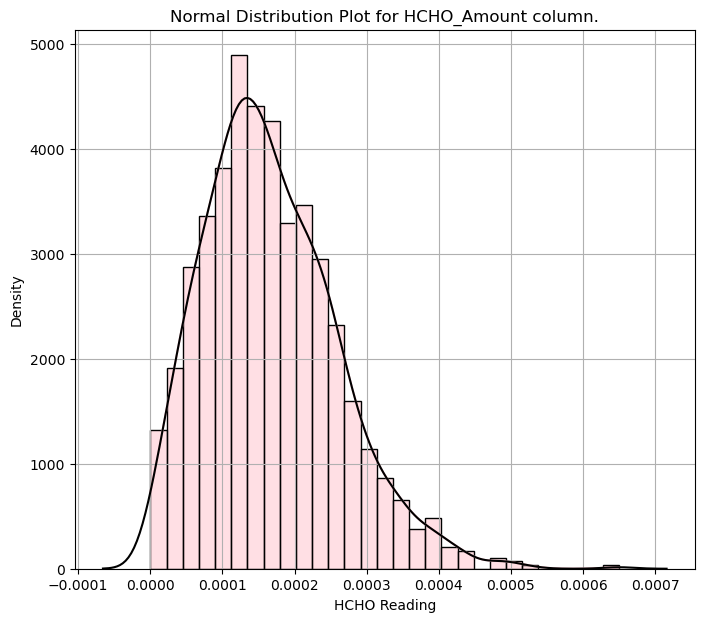

In [31]:
dist_norm(colo_df, 'HCHO_Amount', color='pink')

In [32]:
colo_df = outliers(colo_df, 'HCHO_Amount') # Removing the outliers from the data
colo_df.reset_index(drop=True, inplace=True) # Resetting the index of the dataframe
colo_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
1275,0.000182,Colombo,2023-12-24,2023-12-25
1276,0.000343,Colombo,2023-12-25,2023-12-26
1277,0.000118,Colombo,2023-12-27,2023-12-28
1278,0.000140,Colombo,2023-12-30,2023-12-31


In [33]:
colo_df = replace(colo_df) # Replacing the NaN values with the mean of the column
colo_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
1275,0.000182,Colombo,2023-12-24,2023-12-25
1276,0.000343,Colombo,2023-12-25,2023-12-26
1277,0.000118,Colombo,2023-12-27,2023-12-28
1278,0.000140,Colombo,2023-12-30,2023-12-31


In [34]:
colo_df.isnull().sum()

HCHO_Amount     0
Location        0
Present_Date    0
Next_Date       0
dtype: int64

In [35]:
print("Statistical Analysis of HCHO Amount in Colombo:")
stat_analysis(colo_df, 'HCHO_Amount') # Statistical analysis of the data

Statistical Analysis of HCHO Amount in Colombo:
Mean: 0.00016487971079346629
Median: 0.00015511855244360002
Mode: 2.1119343670942215e-07
Standard Deviation: 8.822259052873074e-05


In [36]:
colo_df.to_csv('colo_cleaned.csv', index=False)

Nuwara Eliya Data Frame

In [37]:
nuwaE_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,Nuwara Eliya,2019-01-01,2019-01-02
1,NaN,Nuwara Eliya,2019-01-02,2019-01-03
2,0.000191,Nuwara Eliya,2019-01-03,2019-01-04
3,0.000051,Nuwara Eliya,2019-01-04,2019-01-05
4,0.000065,Nuwara Eliya,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Nuwara Eliya,2023-12-27,2023-12-28
1822,NaN,Nuwara Eliya,2023-12-28,2023-12-29
1823,NaN,Nuwara Eliya,2023-12-29,2023-12-30
1824,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [38]:
nuwaE_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

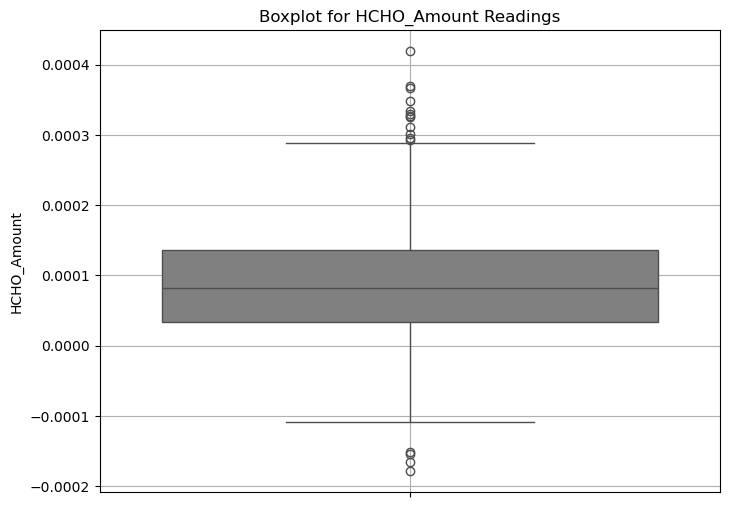

In [39]:
box_plot(nuwaE_df, 'HCHO_Amount', color='grey')

In [40]:
nuwaE_df = neg_null(nuwaE_df, 'HCHO_Amount')
nuwaE_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,Nuwara Eliya,2019-01-01,2019-01-02
1,NaN,Nuwara Eliya,2019-01-02,2019-01-03
2,0.000191,Nuwara Eliya,2019-01-03,2019-01-04
3,0.000051,Nuwara Eliya,2019-01-04,2019-01-05
4,0.000065,Nuwara Eliya,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Nuwara Eliya,2023-12-27,2023-12-28
1822,NaN,Nuwara Eliya,2023-12-28,2023-12-29
1823,NaN,Nuwara Eliya,2023-12-29,2023-12-30
1824,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [41]:
nuwaE_df.isnull().sum() 

HCHO_Amount     1181
Location           0
Present_Date       0
Next_Date          0
dtype: int64

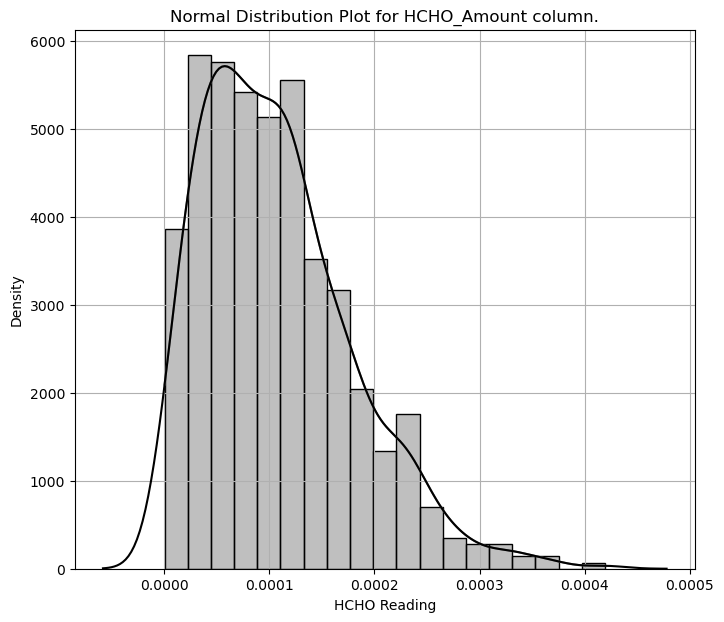

In [42]:
dist_norm(nuwaE_df, 'HCHO_Amount', color='grey')

In [43]:
nuwaE_df = outliers(nuwaE_df, 'HCHO_Amount') # Removing the outliers from the data
nuwaE_df.reset_index(drop=True, inplace=True) # Resetting the index of the dataframe
nuwaE_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000191,Nuwara Eliya,2019-01-03,2019-01-04
1,0.000051,Nuwara Eliya,2019-01-04,2019-01-05
2,0.000065,Nuwara Eliya,2019-01-05,2019-01-06
3,0.000090,Nuwara Eliya,2019-01-06,2019-01-07
4,0.000041,Nuwara Eliya,2019-01-07,2019-01-08
...,...,...,...,...
632,0.000041,Nuwara Eliya,2023-11-11,2023-11-12
633,0.000036,Nuwara Eliya,2023-11-23,2023-11-24
634,0.000108,Nuwara Eliya,2023-12-13,2023-12-14
635,0.000006,Nuwara Eliya,2023-12-17,2023-12-18


In [44]:
nuwaE_df = replace(nuwaE_df) # Replacing the NaN values with the mean of the column
nuwaE_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000191,Nuwara Eliya,2019-01-03,2019-01-04
1,0.000051,Nuwara Eliya,2019-01-04,2019-01-05
2,0.000065,Nuwara Eliya,2019-01-05,2019-01-06
3,0.000090,Nuwara Eliya,2019-01-06,2019-01-07
4,0.000041,Nuwara Eliya,2019-01-07,2019-01-08
...,...,...,...,...
632,0.000041,Nuwara Eliya,2023-11-11,2023-11-12
633,0.000036,Nuwara Eliya,2023-11-23,2023-11-24
634,0.000108,Nuwara Eliya,2023-12-13,2023-12-14
635,0.000006,Nuwara Eliya,2023-12-17,2023-12-18


In [45]:
nuwaE_df.isnull().sum() 

HCHO_Amount     0
Location        0
Present_Date    0
Next_Date       0
dtype: int64

In [46]:
print("Statistical Analysis of HCHO Amount in Nuwara Eliya:")
stat_analysis(nuwaE_df, 'HCHO_Amount') # Statistical analysis of the data

Statistical Analysis of HCHO Amount in Nuwara Eliya:
Mean: 0.0001037491630817278
Median: 9.527971988931567e-05
Mode: 4.36330277496733e-07
Standard Deviation: 6.607535660146218e-05


In [47]:
nuwaE_df.to_csv("nuwara_eliya_df.csv", index=False)

Monaragala, Kurunegala, Jaffna Data Frame

In [48]:
mkj_df = pd.read_csv("mon_kur_jaf_output.csv", header=None)
mkj_df.columns = col_names # adding the column names to the dataframe
mkj_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [49]:
mkj_df.loc[mkj_df['Location'] == "Bibile, Monaragala", "Location"] = "Monaragala"
mkj_df.loc[mkj_df['Location'] == "Kurunegala Proper", "Location"] = "Kurunegala"
mkj_df.loc[mkj_df['Location'] == "Jaffna Proper", "Location"] = "Jaffna"
mkj_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,Monaragala,2019-01-01,2019-01-02
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
4,-0.000018,Monaragala,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna,2023-12-27,2023-12-28
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [50]:
mkj_df.size

21912

In [51]:
mkj_df.dtypes

HCHO_Amount     float64
Location         object
Present_Date     object
Next_Date        object
dtype: object

In [52]:
mkj_df['Present_Date'] = pd.to_datetime(mkj_df['Present_Date'])
mkj_df['Next_Date'] = pd.to_datetime(mkj_df['Next_Date'])
mkj_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

In [53]:
mon_df = mkj_df[mkj_df['Location'] == 'Monaragala']
kur_df = mkj_df[mkj_df['Location'] == 'Kurunegala']
jaf_df = mkj_df[mkj_df['Location'] == 'Jaffna']

mon_df.reset_index(drop=True, inplace=True)
kur_df.reset_index(drop=True, inplace=True)
jaf_df.reset_index(drop=True, inplace=True)

Kurunegala Data Frame 

In [54]:
kur_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

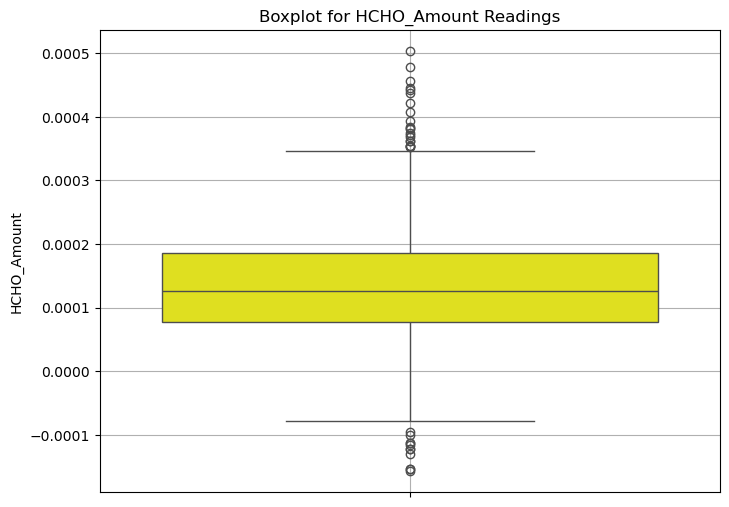

In [55]:
box_plot(kur_df, 'HCHO_Amount', color='yellow')

In [56]:
kur_df = neg_null(kur_df, 'HCHO_Amount')
kur_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000088,Kurunegala,2019-01-01,2019-01-02
1,0.000137,Kurunegala,2019-01-02,2019-01-03
2,0.000148,Kurunegala,2019-01-03,2019-01-04
3,NaN,Kurunegala,2019-01-04,2019-01-05
4,0.000249,Kurunegala,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000075,Kurunegala,2023-12-27,2023-12-28
1822,NaN,Kurunegala,2023-12-28,2023-12-29
1823,NaN,Kurunegala,2023-12-29,2023-12-30
1824,0.000158,Kurunegala,2023-12-30,2023-12-31


In [57]:
kur_df.isnull().sum()

HCHO_Amount     648
Location          0
Present_Date      0
Next_Date         0
dtype: int64

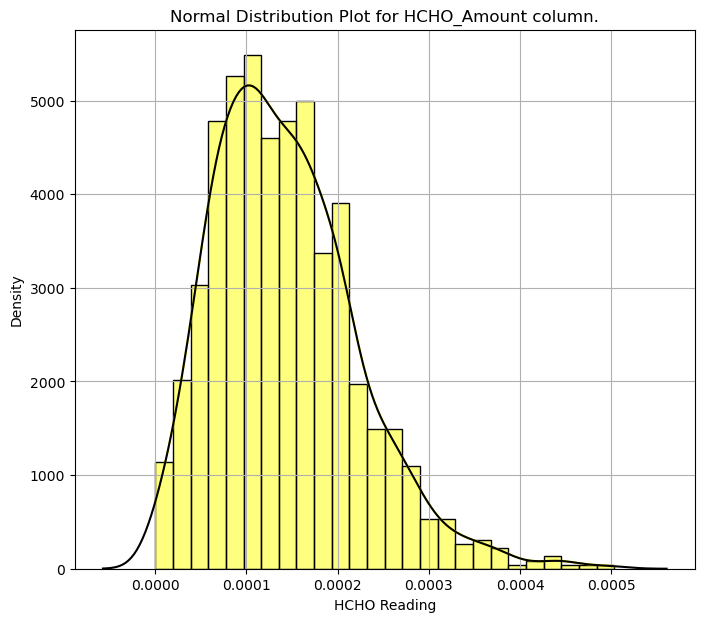

In [58]:
dist_norm(kur_df, 'HCHO_Amount', color='yellow')

In [59]:
kur_df = outliers(kur_df, 'HCHO_Amount')
kur_df.reset_index(drop=True, inplace=True)
kur_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000088,Kurunegala,2019-01-01,2019-01-02
1,0.000137,Kurunegala,2019-01-02,2019-01-03
2,0.000148,Kurunegala,2019-01-03,2019-01-04
3,0.000249,Kurunegala,2019-01-05,2019-01-06
4,0.000102,Kurunegala,2019-01-06,2019-01-07
...,...,...,...,...
1161,0.000063,Kurunegala,2023-12-23,2023-12-24
1162,0.000094,Kurunegala,2023-12-25,2023-12-26
1163,0.000152,Kurunegala,2023-12-26,2023-12-27
1164,0.000075,Kurunegala,2023-12-27,2023-12-28


In [60]:
kur_df = replace(kur_df)
kur_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000088,Kurunegala,2019-01-01,2019-01-02
1,0.000137,Kurunegala,2019-01-02,2019-01-03
2,0.000148,Kurunegala,2019-01-03,2019-01-04
3,0.000249,Kurunegala,2019-01-05,2019-01-06
4,0.000102,Kurunegala,2019-01-06,2019-01-07
...,...,...,...,...
1161,0.000063,Kurunegala,2023-12-23,2023-12-24
1162,0.000094,Kurunegala,2023-12-25,2023-12-26
1163,0.000152,Kurunegala,2023-12-26,2023-12-27
1164,0.000075,Kurunegala,2023-12-27,2023-12-28


In [61]:
kur_df.isnull().sum()

HCHO_Amount     0
Location        0
Present_Date    0
Next_Date       0
dtype: int64

In [62]:
print("Statistical Analysis of HCHO Amount in Kurunegala:")
stat_analysis(kur_df, 'HCHO_Amount')

Statistical Analysis of HCHO Amount in Kurunegala:
Mean: 0.00013968606709372416
Median: 0.0001325175118745
Mode: 1.4333763162876774e-07
Standard Deviation: 7.326576074631087e-05


In [63]:
kur_df.to_csv('kurunegala_cleaned.csv', index=False)

Monaragala Data Frame

In [64]:
mon_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,Monaragala,2019-01-01,2019-01-02
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
4,-0.000018,Monaragala,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Monaragala,2023-12-27,2023-12-28
1822,NaN,Monaragala,2023-12-28,2023-12-29
1823,NaN,Monaragala,2023-12-29,2023-12-30
1824,NaN,Monaragala,2023-12-30,2023-12-31


In [65]:
mon_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

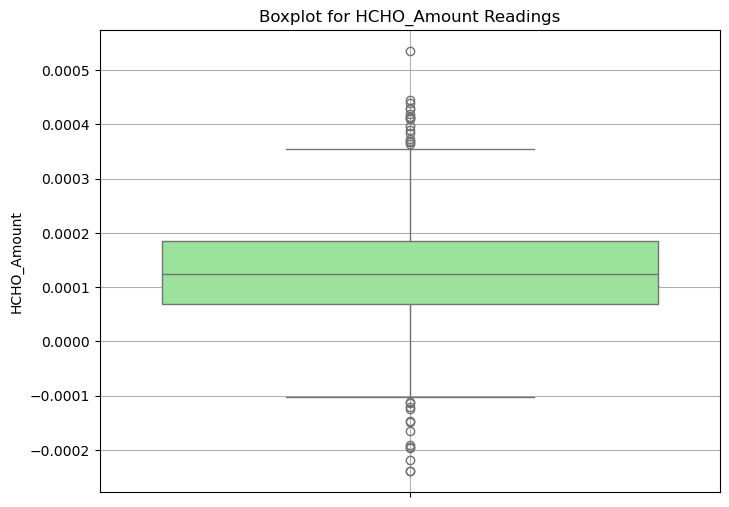

In [66]:
box_plot(mon_df, 'HCHO_Amount', color='lightgreen')

In [67]:
mon_df = neg_null(mon_df, 'HCHO_Amount')
mon_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,NaN,Monaragala,2019-01-01,2019-01-02
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
4,NaN,Monaragala,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Monaragala,2023-12-27,2023-12-28
1822,NaN,Monaragala,2023-12-28,2023-12-29
1823,NaN,Monaragala,2023-12-29,2023-12-30
1824,NaN,Monaragala,2023-12-30,2023-12-31


In [68]:
mon_df.isnull().sum()

HCHO_Amount     774
Location          0
Present_Date      0
Next_Date         0
dtype: int64

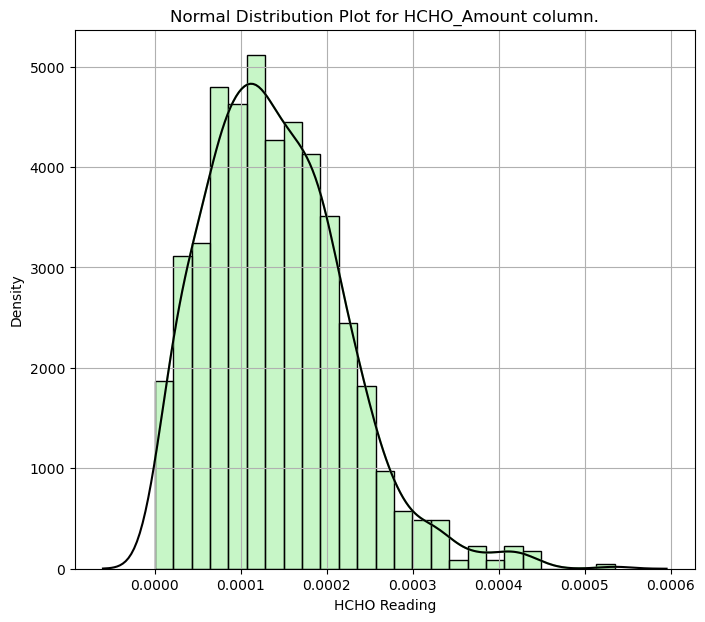

In [69]:
dist_norm(mon_df, 'HCHO_Amount', color='lightgreen')

In [70]:
mon_df = outliers(mon_df, 'HCHO_Amount')
mon_df.reset_index(drop=True, inplace=True)
mon_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000019,Monaragala,2019-01-02,2019-01-03
1,0.000028,Monaragala,2019-01-03,2019-01-04
2,0.000037,Monaragala,2019-01-04,2019-01-05
3,0.000146,Monaragala,2019-01-06,2019-01-07
4,0.000028,Monaragala,2019-01-07,2019-01-08
...,...,...,...,...
1034,0.000140,Monaragala,2023-12-11,2023-12-12
1035,0.000188,Monaragala,2023-12-14,2023-12-15
1036,0.000052,Monaragala,2023-12-18,2023-12-19
1037,0.000149,Monaragala,2023-12-23,2023-12-24


In [71]:
mon_df = replace(mon_df)
mon_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000019,Monaragala,2019-01-02,2019-01-03
1,0.000028,Monaragala,2019-01-03,2019-01-04
2,0.000037,Monaragala,2019-01-04,2019-01-05
3,0.000146,Monaragala,2019-01-06,2019-01-07
4,0.000028,Monaragala,2019-01-07,2019-01-08
...,...,...,...,...
1034,0.000140,Monaragala,2023-12-11,2023-12-12
1035,0.000188,Monaragala,2023-12-14,2023-12-15
1036,0.000052,Monaragala,2023-12-18,2023-12-19
1037,0.000149,Monaragala,2023-12-23,2023-12-24


In [72]:
mon_df.isnull().sum()

HCHO_Amount     0
Location        0
Present_Date    0
Next_Date       0
dtype: int64

In [73]:
print("Statistical Analysis of HCHO Amount in Monaragala:")
stat_analysis(mon_df, 'HCHO_Amount')    

Statistical Analysis of HCHO Amount in Monaragala:
Mean: 0.0001367559451127927
Median: 0.000129308743732
Mode: 1.4612316831653266e-07
Standard Deviation: 7.440759809094741e-05


In [74]:
mon_df.to_csv('monaragala_cleaned.csv', index=False)

Jaffna Data Frame

In [75]:
jaf_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000058,Jaffna,2019-01-01,2019-01-02
1,0.000102,Jaffna,2019-01-02,2019-01-03
2,0.000039,Jaffna,2019-01-03,2019-01-04
3,-0.000002,Jaffna,2019-01-04,2019-01-05
4,0.000159,Jaffna,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Jaffna,2023-12-27,2023-12-28
1822,0.000051,Jaffna,2023-12-28,2023-12-29
1823,0.000127,Jaffna,2023-12-29,2023-12-30
1824,0.000117,Jaffna,2023-12-30,2023-12-31


In [76]:
jaf_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

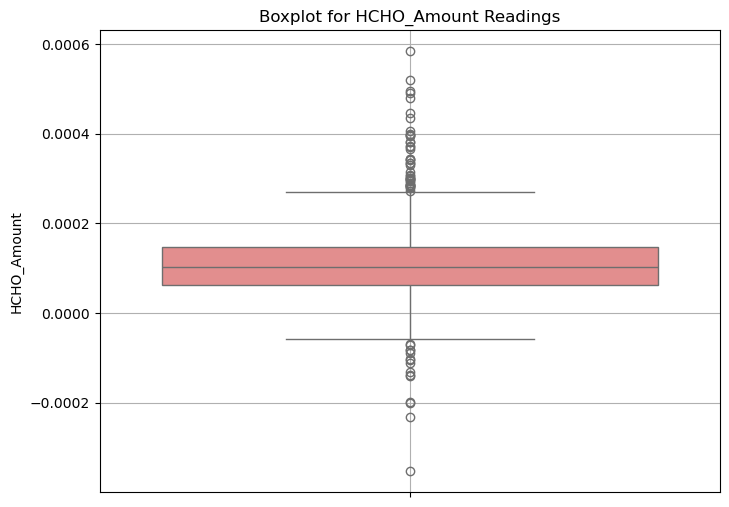

In [77]:
box_plot(jaf_df, 'HCHO_Amount', color='lightcoral')

In [78]:
jaf_df = neg_null(jaf_df, 'HCHO_Amount')
jaf_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000058,Jaffna,2019-01-01,2019-01-02
1,0.000102,Jaffna,2019-01-02,2019-01-03
2,0.000039,Jaffna,2019-01-03,2019-01-04
3,NaN,Jaffna,2019-01-04,2019-01-05
4,0.000159,Jaffna,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Jaffna,2023-12-27,2023-12-28
1822,0.000051,Jaffna,2023-12-28,2023-12-29
1823,0.000127,Jaffna,2023-12-29,2023-12-30
1824,0.000117,Jaffna,2023-12-30,2023-12-31


In [79]:
jaf_df.isnull().sum()

HCHO_Amount     422
Location          0
Present_Date      0
Next_Date         0
dtype: int64

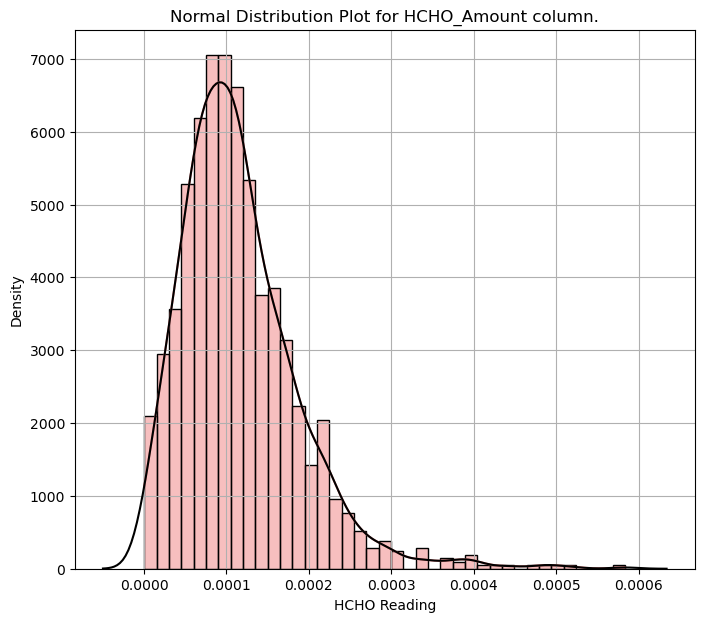

In [80]:
dist_norm(jaf_df, 'HCHO_Amount', color='lightcoral')

In [81]:
jaf_df = outliers(jaf_df, 'HCHO_Amount')
jaf_df.reset_index(drop=True, inplace=True)
jaf_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000058,Jaffna,2019-01-01,2019-01-02
1,0.000102,Jaffna,2019-01-02,2019-01-03
2,0.000039,Jaffna,2019-01-03,2019-01-04
3,0.000159,Jaffna,2019-01-05,2019-01-06
4,0.000075,Jaffna,2019-01-06,2019-01-07
...,...,...,...,...
1376,0.000088,Jaffna,2023-12-24,2023-12-25
1377,0.000051,Jaffna,2023-12-28,2023-12-29
1378,0.000127,Jaffna,2023-12-29,2023-12-30
1379,0.000117,Jaffna,2023-12-30,2023-12-31


In [82]:
jaf_df = replace(jaf_df)
jaf_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000058,Jaffna,2019-01-01,2019-01-02
1,0.000102,Jaffna,2019-01-02,2019-01-03
2,0.000039,Jaffna,2019-01-03,2019-01-04
3,0.000159,Jaffna,2019-01-05,2019-01-06
4,0.000075,Jaffna,2019-01-06,2019-01-07
...,...,...,...,...
1376,0.000088,Jaffna,2023-12-24,2023-12-25
1377,0.000051,Jaffna,2023-12-28,2023-12-29
1378,0.000127,Jaffna,2023-12-29,2023-12-30
1379,0.000117,Jaffna,2023-12-30,2023-12-31


In [83]:
jaf_df.isnull().sum()

HCHO_Amount     0
Location        0
Present_Date    0
Next_Date       0
dtype: int64

In [84]:
print("Statistical Analysis of HCHO Amount in Jaffna:")
stat_analysis(jaf_df, 'HCHO_Amount')

Statistical Analysis of HCHO Amount in Jaffna:
Mean: 0.000110588005374901
Median: 0.0001030325171612
Mode: 4.10346731297695e-07
Standard Deviation: 6.0713737567834214e-05


In [85]:
jaf_df.to_csv('jaffna_cleaned.csv', index=False)

Kandy Given Data Frame

In [86]:
kan_df = pd.read_csv("kan_output.csv", header=None)
kan_df.columns = col_names
kan_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [87]:
kan_df.loc[kan_df['Location'] == "Kandy Proper", "Location"] = "Kandy"
kan_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,NaN,Kandy,2019-01-03,2019-01-04
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy,2023-12-27,2023-12-28
1822,NaN,Kandy,2023-12-28,2023-12-29
1823,NaN,Kandy,2023-12-29,2023-12-30
1824,0.000056,Kandy,2023-12-30,2023-12-31


In [88]:
kan_df.size

7304

In [89]:
kan_df.dtypes

HCHO_Amount     float64
Location         object
Present_Date     object
Next_Date        object
dtype: object

In [90]:
kan_df["Present_Date"] = pd.to_datetime(kan_df["Present_Date"])
kan_df["Next_Date"] = pd.to_datetime(kan_df["Next_Date"])
kan_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

Kandy Data Frame

In [91]:
kan_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,NaN,Kandy,2019-01-03,2019-01-04
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy,2023-12-27,2023-12-28
1822,NaN,Kandy,2023-12-28,2023-12-29
1823,NaN,Kandy,2023-12-29,2023-12-30
1824,0.000056,Kandy,2023-12-30,2023-12-31


In [92]:
kan_df.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

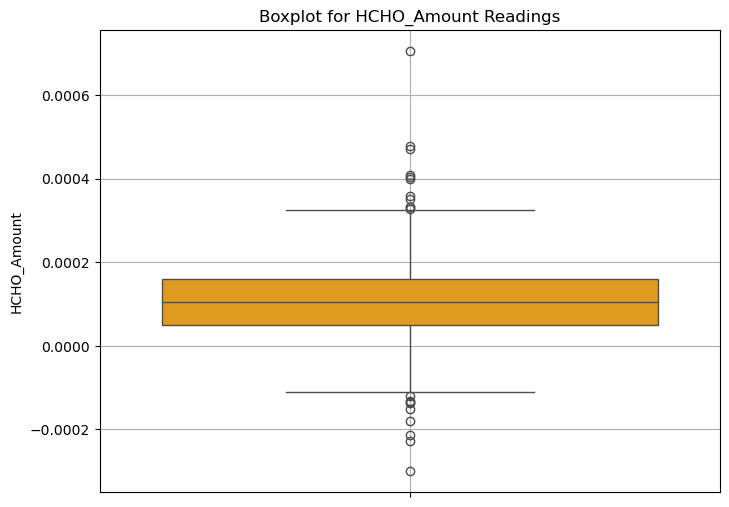

In [93]:
box_plot(kan_df, 'HCHO_Amount', color='orange')

In [94]:
kan_df = neg_null(kan_df, 'HCHO_Amount')
kan_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,NaN,Kandy,2019-01-03,2019-01-04
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy,2023-12-27,2023-12-28
1822,NaN,Kandy,2023-12-28,2023-12-29
1823,NaN,Kandy,2023-12-29,2023-12-30
1824,0.000056,Kandy,2023-12-30,2023-12-31


In [95]:
kan_df.isnull().sum()

HCHO_Amount     901
Location          0
Present_Date      0
Next_Date         0
dtype: int64

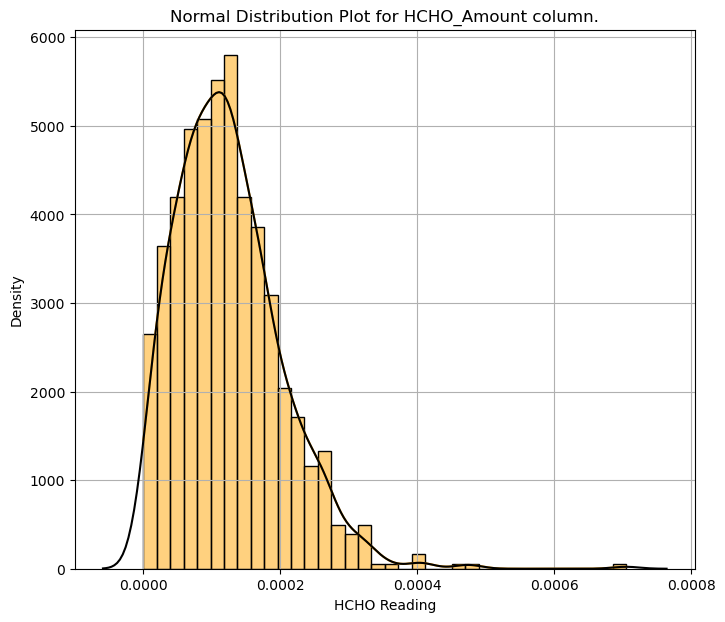

In [96]:
dist_norm(kan_df, 'HCHO_Amount', color='orange')

In [97]:
kan_df = outliers(kan_df, 'HCHO_Amount')
kan_df.reset_index(drop=True, inplace=True)
kan_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,0.000191,Kandy,2019-01-04,2019-01-05
3,0.000122,Kandy,2019-01-05,2019-01-06
4,0.000163,Kandy,2019-01-07,2019-01-08
...,...,...,...,...
913,0.000116,Kandy,2023-12-07,2023-12-08
914,0.000261,Kandy,2023-12-11,2023-12-12
915,0.000114,Kandy,2023-12-21,2023-12-22
916,0.000116,Kandy,2023-12-23,2023-12-24


In [98]:
kan_df = replace(kan_df)
kan_df

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,0.000191,Kandy,2019-01-04,2019-01-05
3,0.000122,Kandy,2019-01-05,2019-01-06
4,0.000163,Kandy,2019-01-07,2019-01-08
...,...,...,...,...
913,0.000116,Kandy,2023-12-07,2023-12-08
914,0.000261,Kandy,2023-12-11,2023-12-12
915,0.000114,Kandy,2023-12-21,2023-12-22
916,0.000116,Kandy,2023-12-23,2023-12-24


In [99]:
kan_df.isnull().sum()

HCHO_Amount     0
Location        0
Present_Date    0
Next_Date       0
dtype: int64

In [100]:
print("Statistical Analysis of HCHO Amount in Kandy:")
stat_analysis(kan_df, 'HCHO_Amount')

Statistical Analysis of HCHO Amount in Kandy:
Mean: 0.00012201022314764176
Median: 0.00011426544932259999
Mode: 1.569671117488859e-07
Standard Deviation: 7.117573168516854e-05


In [101]:
kan_df.to_csv('kandy_cleaned.csv', index=False)

Connecting The Seperate Data Frames

In [102]:
HCHO_DF = []

csv_names = ['mata_cleaned.csv', 'colo_cleaned.csv', 'nuwara_eliya_df.csv', 'monaragala_cleaned.csv', 'kurunegala_cleaned.csv', 'jaffna_cleaned.csv', 'kandy_cleaned.csv']

for file in csv_names:
    data_frame = pd.read_csv(file)
    HCHO_DF.append(data_frame)

combined = pd.concat(HCHO_DF, ignore_index=True)
combined.reset_index(drop=True, inplace=True)

combined.to_csv('combined_cleaned.csv', index=False)
combined

,HCHO_Amount,Location,Present_Date,Next_Date
0,0.000006,Matara,2019-01-02,2019-01-03
1,0.000236,Matara,2019-01-03,2019-01-04
2,0.000064,Matara,2019-01-04,2019-01-05
3,0.000053,Matara,2019-01-05,2019-01-06
4,0.000132,Matara,2019-01-06,2019-01-07
...,...,...,...,...
7268,0.000116,Kandy,2023-12-07,2023-12-08
7269,0.000261,Kandy,2023-12-11,2023-12-12
7270,0.000114,Kandy,2023-12-21,2023-12-22
7271,0.000116,Kandy,2023-12-23,2023-12-24


In [103]:
combined.dtypes

HCHO_Amount     float64
Location         object
Present_Date     object
Next_Date        object
dtype: object

In [104]:
combined['Present_Date'] = pd.to_datetime(combined['Present_Date']) # Converting the date columns into datetime format
combined['Next_Date'] = pd.to_datetime(combined['Next_Date'])
combined.dtypes

HCHO_Amount            float64
Location                object
Present_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

In [105]:
locations = ['Colombo', 'Matara', 'Nuwara Eliya', 'Monaragala', 'Kurunegala', 'Jaffna', 'Kandy']

stat = combined.groupby('Location')['HCHO_Amount'].describe()

print(stat)


               count      mean       std           min       25%       50%  \
Location                                                                     
Colombo       1280.0  0.000165  0.000088  2.111934e-07  0.000100  0.000155   
Jaffna        1381.0  0.000111  0.000061  4.103467e-07  0.000067  0.000103   
Kandy          918.0  0.000122  0.000071  1.569671e-07  0.000069  0.000114   
Kurunegala    1166.0  0.000140  0.000073  1.433376e-07  0.000085  0.000133   
Matara         852.0  0.000104  0.000068  8.485600e-08  0.000053  0.000091   
Monaragala    1039.0  0.000137  0.000074  1.461232e-07  0.000080  0.000129   
Nuwara Eliya   637.0  0.000104  0.000066  4.363303e-07  0.000051  0.000095   

                   75%       max  
Location                          
Colombo       0.000222  0.000440  
Jaffna        0.000146  0.000314  
Kandy         0.000165  0.000351  
Kurunegala    0.000187  0.000375  
Matara        0.000145  0.000362  
Monaragala    0.000188  0.000373  
Nuwara Eliya  0.0

In [106]:
print("Statistical Analysis of HCHO Amount in Combined Data:")
stat_analysis(combined, 'HCHO_Amount')

Statistical Analysis of HCHO Amount in Combined Data:
Mean: 0.00012857930117107997
Median: 0.000118202084601
Mode: 8.48560045610269e-08
Standard Deviation: 7.573872281058034e-05


Data Visualiztion 

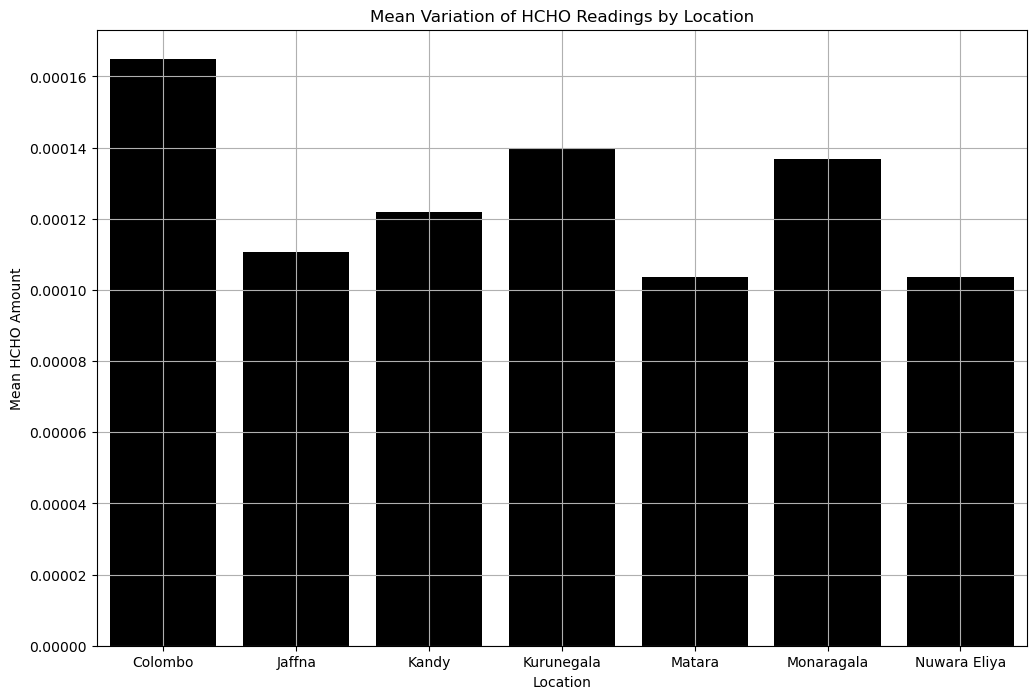

In [107]:
mean_HCHO = combined.groupby('Location')['HCHO_Amount'].mean().reset_index() # Finding the mean of the HCHO readings by location
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_HCHO, x='Location', y='HCHO_Amount', color='black')
plt.title("Mean Variation of HCHO Readings by Location")
plt.xlabel("Location")
plt.ylabel("Mean HCHO Amount")
plt.grid(True)
plt.show()

## Analysis Based On Location

In [108]:
def hcho_v_date(dataframe): # Plotting the HCHO readings against the year
    dataframe['Present_Date'] = pd.to_datetime(dataframe['Present_Date'])
    dataframe['Year'] = dataframe['Present_Date'].dt.year
    yearly_mean = dataframe.groupby('Year')['HCHO_Amount'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(yearly_mean.index, yearly_mean.values, marker='o', linestyle='-', color='red')
    plt.title("Mean HCHO Amount vs Year")
    plt.xlabel("Year")
    plt.ylabel("Mean HCHO Amount")
    plt.grid(True)
    plt.show()

Colombo


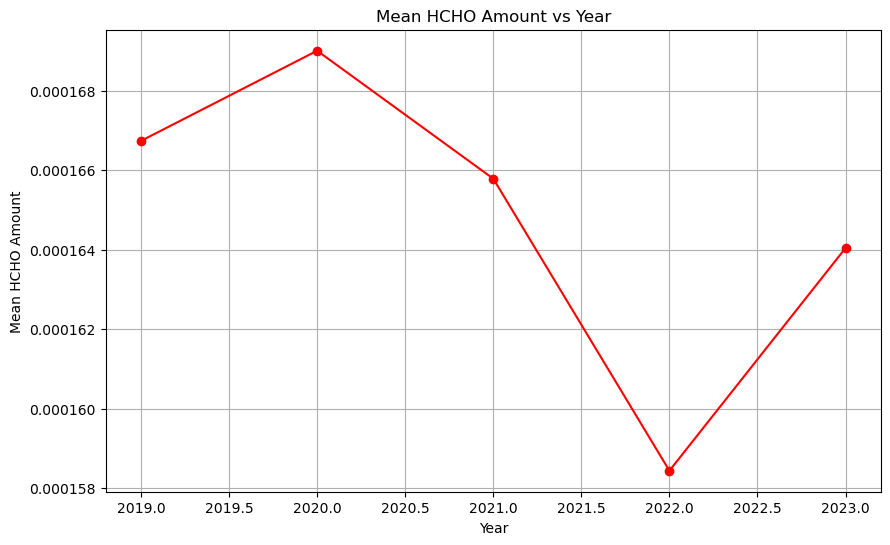

Matara


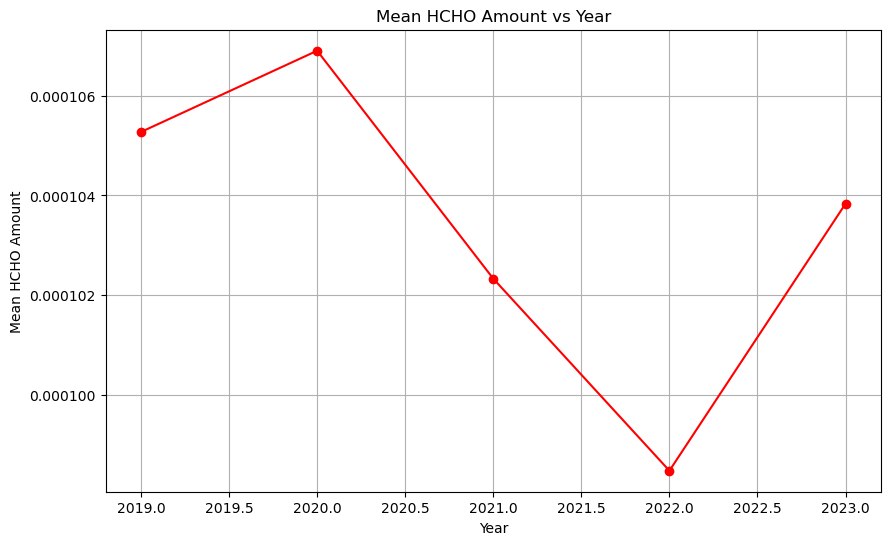

Nuwara Eliya


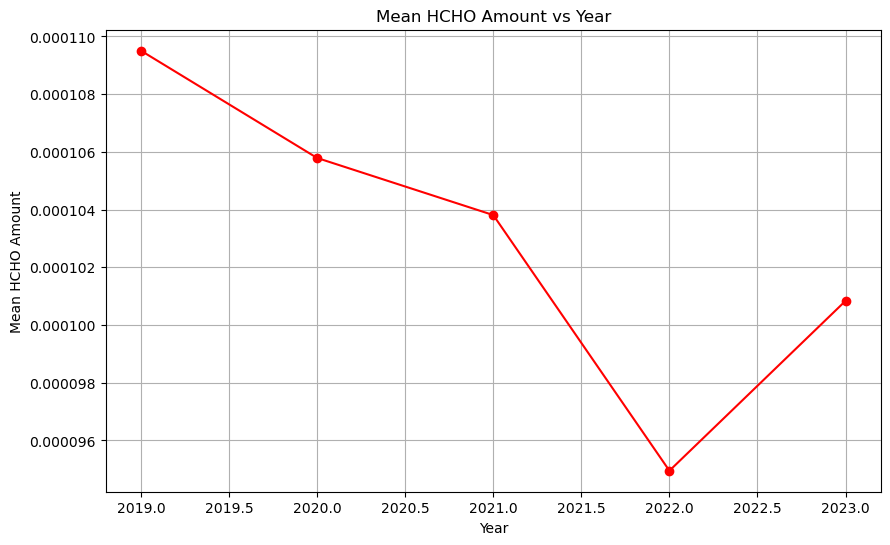

Kandy


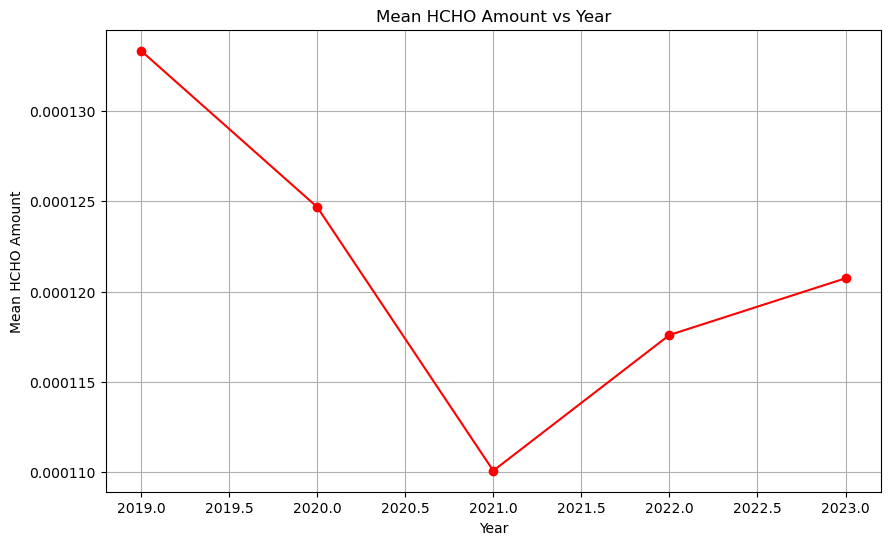

Monaragala


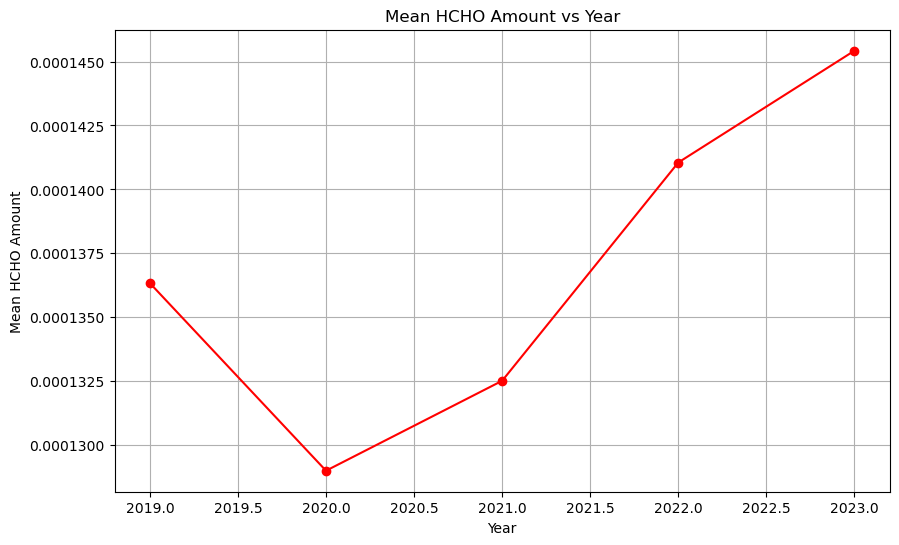

Kurunegala


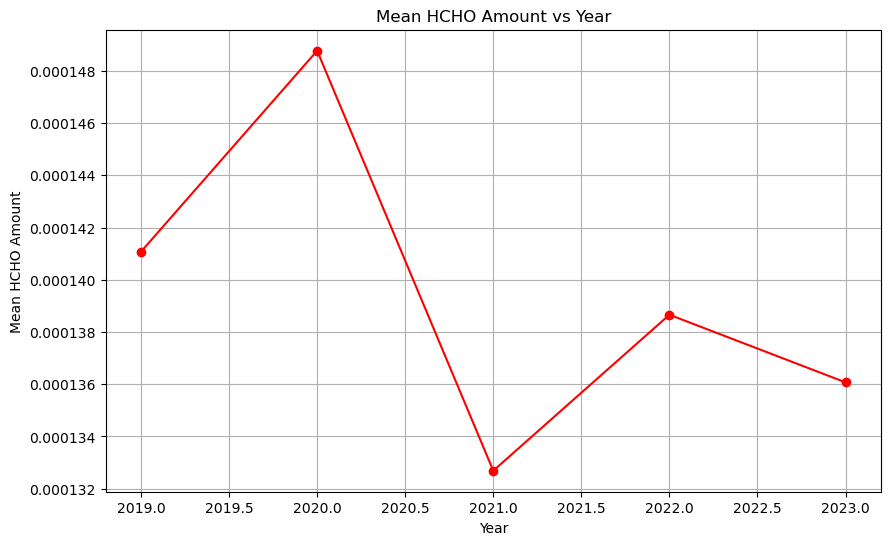

Jaffna


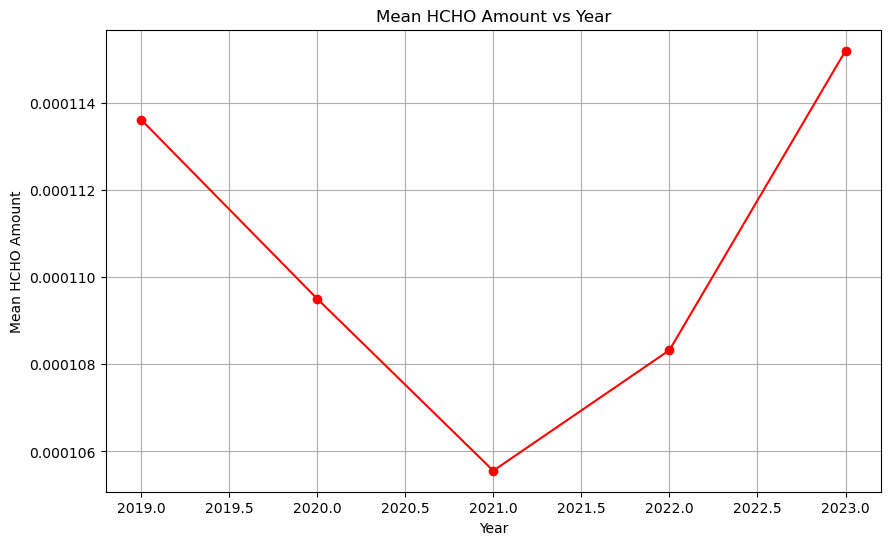

In [109]:
print("Colombo")
hcho_v_date(colo_df)
print("Matara")
hcho_v_date(mata_df)
print("Nuwara Eliya")
hcho_v_date(nuwaE_df)
print("Kandy")
hcho_v_date(kan_df)
print("Monaragala")
hcho_v_date(mon_df)
print("Kurunegala")
hcho_v_date(kur_df)
print("Jaffna")
hcho_v_date(jaf_df)

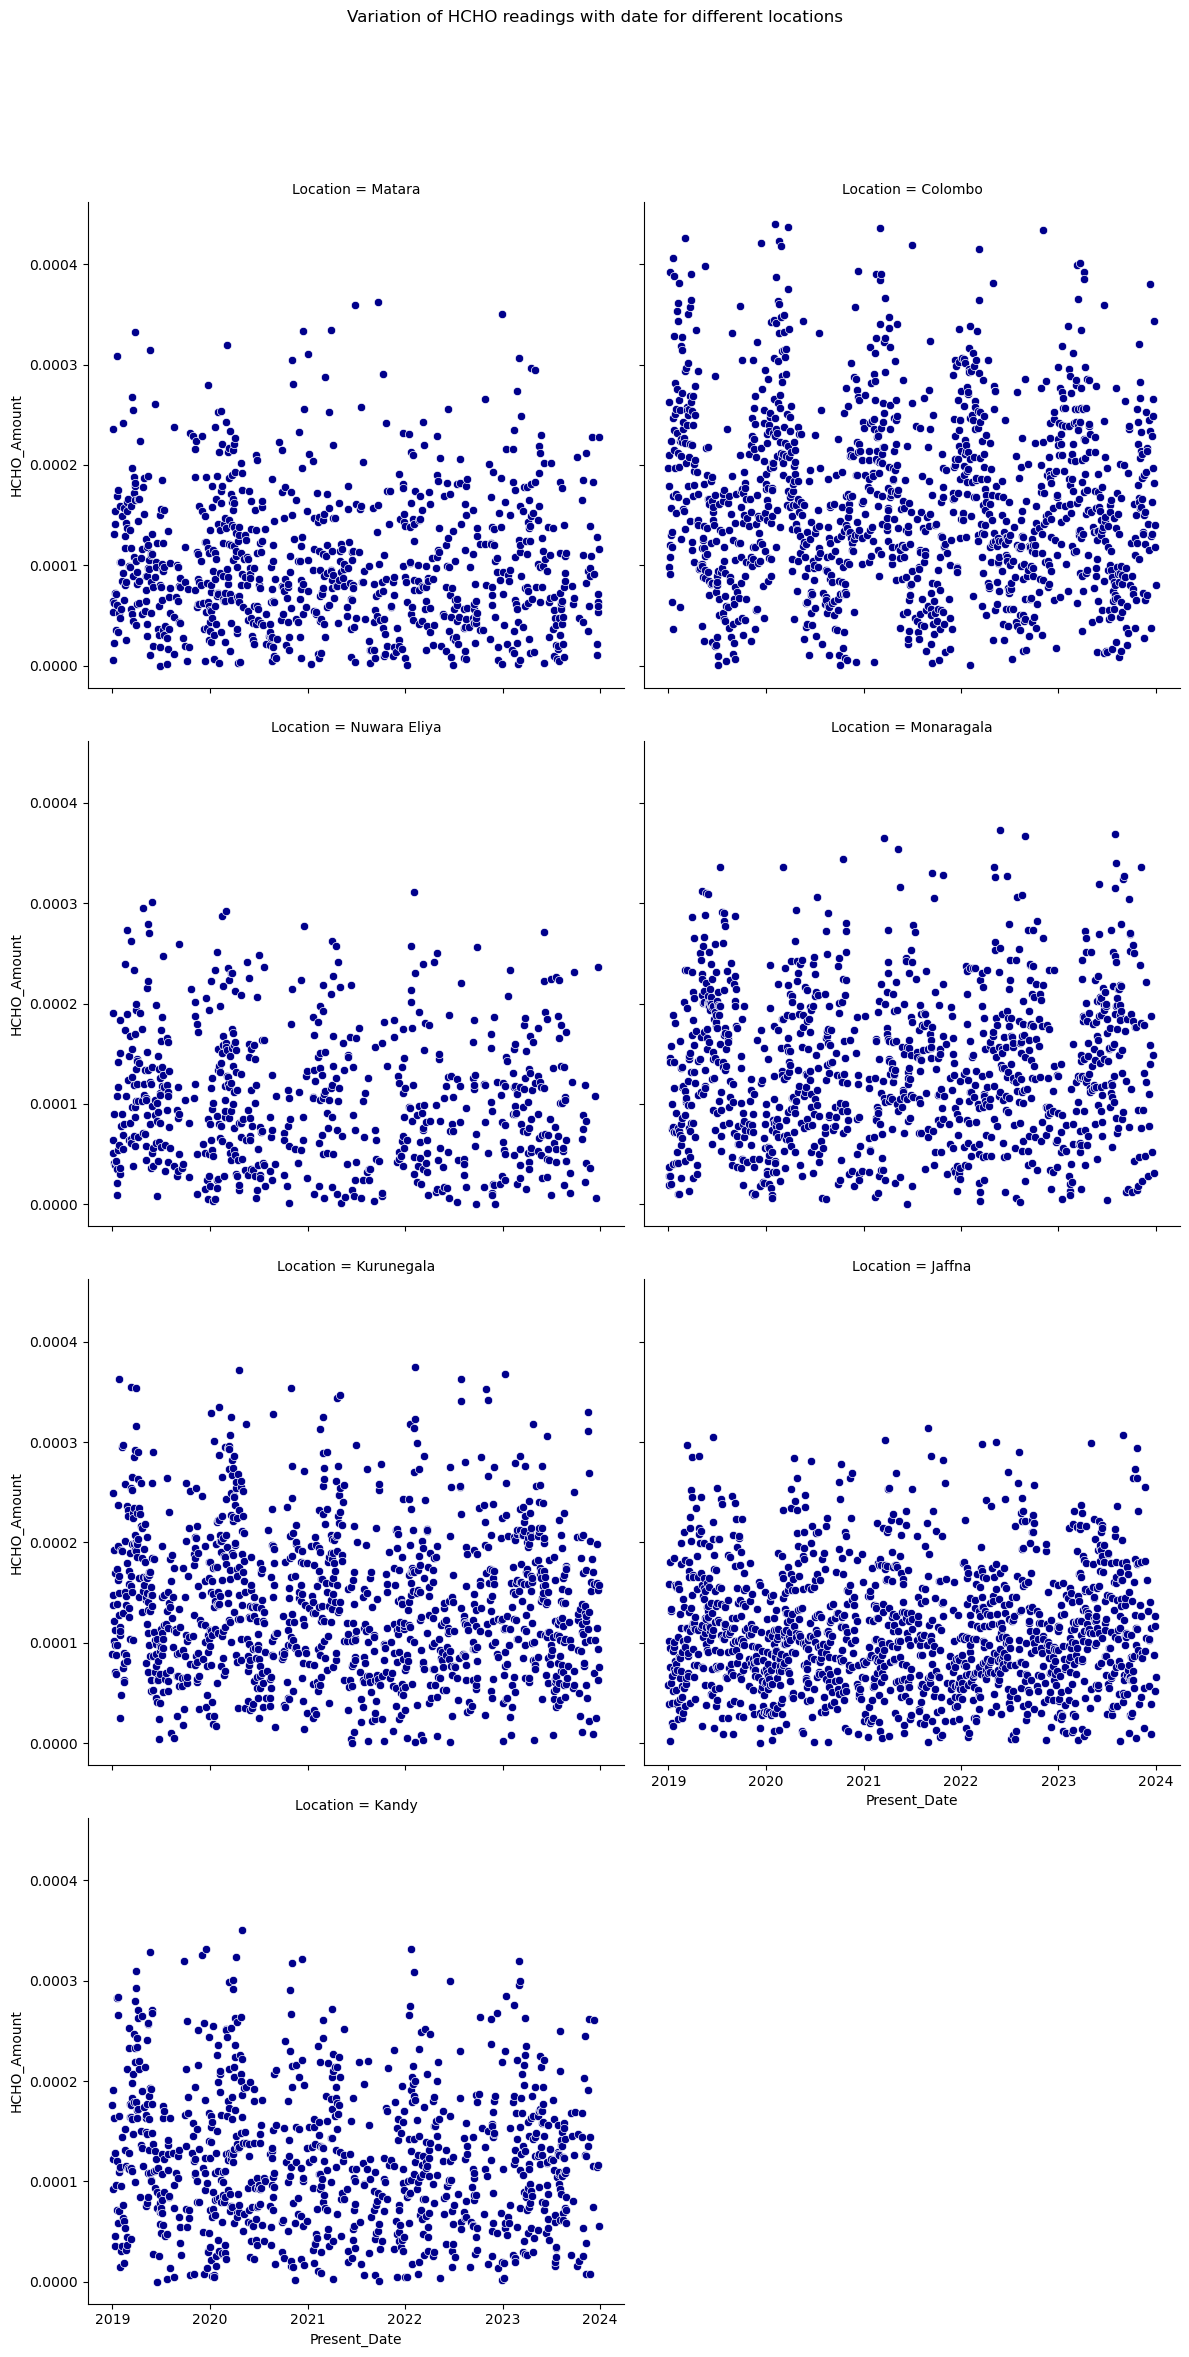

In [110]:
graph = sns.FacetGrid(combined, col='Location', col_wrap=2, height=6) #Scatterplot graphs for the seperate locations 
graph.map(sns.scatterplot, "Present_Date", "HCHO_Amount", color="darkblue")
plt.subplots_adjust(top=0.9)
graph.figure.suptitle("Variation of HCHO readings with date for different locations")
plt.show()

Population Density 

* Colombo- 13,364 persons/km^2
* Nuwara Eliya- 420 persons/km^2
* Matara- 630 persons/km^2
* Kandy-710 persons/km^2
* Monaragala- 80 persons/km^2
* Jaffna- 611 persons/km^2
* Kurunegala- 362 persons/km^2


- Source: [Wikipedia](https://www.wikipedia.org/)

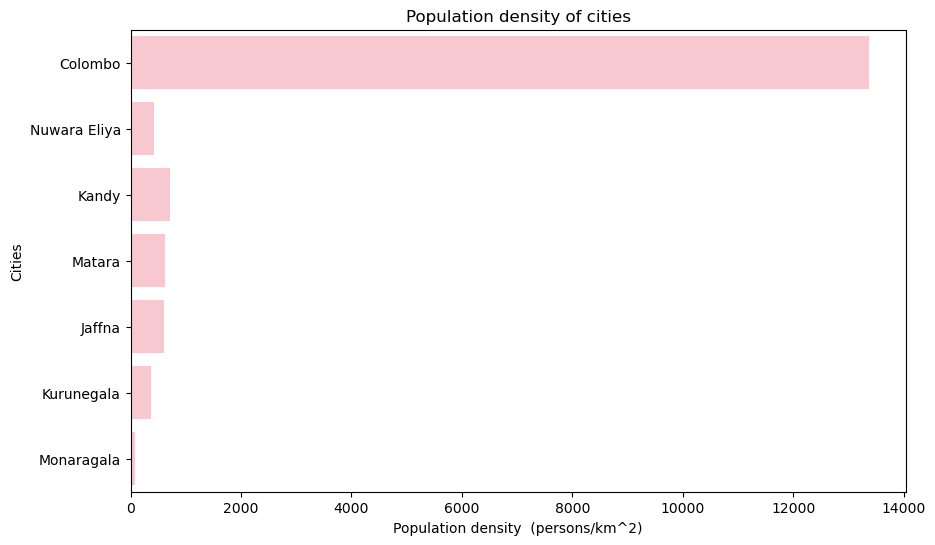

In [111]:
plt.figure(figsize=(10,6))
cities = ['Colombo','Nuwara Eliya','Kandy','Matara','Jaffna','Kurunegala','Monaragala']
population_density = [13364,420,710,630,611,362,80]
sns.barplot(x=population_density, y=cities, color='pink')
plt.title("Population density of cities")
plt.ylabel("Cities")
plt.xlabel("Population density  (persons/km^2)")
plt.show()

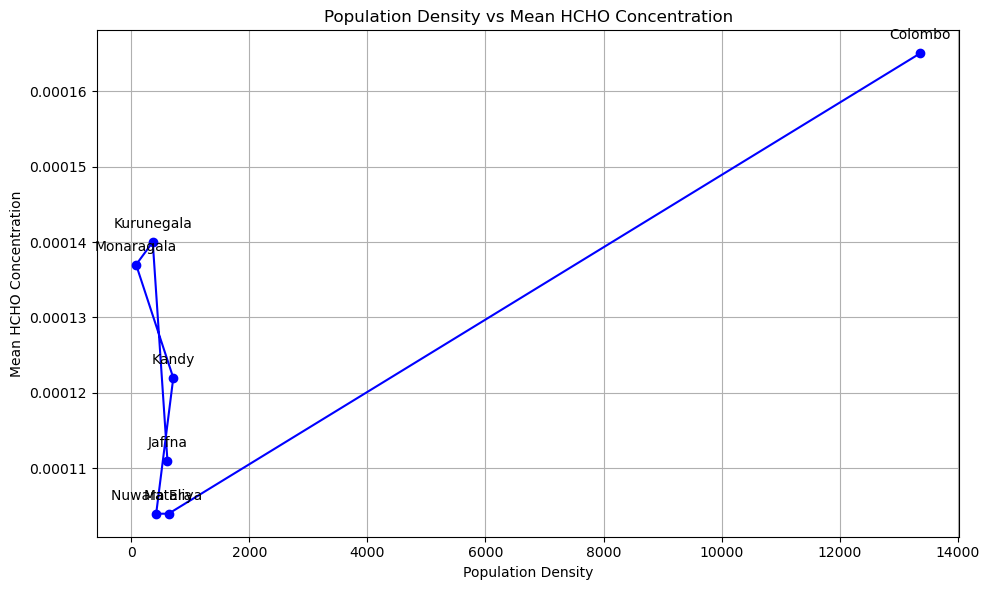

In [112]:
population_density = [13364,630,420,710,80,362,611]
mean_hcho_levels = [0.000165, 0.000104, 0.000104, 0.000122, 0.000137, 0.00014, 0.000111]
cities = ['Colombo', 'Matara', 'Nuwara Eliya', 'Kandy', 'Monaragala', 'Kurunegala', 'Jaffna']
correlation = np.corrcoef(mean_hcho_levels, population_density)
# plotting a line plot
plt.figure(figsize=(10,6))
plt.plot(population_density, mean_hcho_levels, marker='o', color='blue', linestyle='-')
# marking the name of the cities on the plot
for i, city in enumerate(cities):
    plt.annotate(city, (population_density[i], mean_hcho_levels[i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.title('Population Density vs Mean HCHO Concentration')
plt.xlabel('Population Density')
plt.ylabel('Mean HCHO Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
population_density = [13364,630,420,710,80,362,611]
mean_hcho_levels = [0.000165, 0.000104, 0.000104, 0.000122, 0.000137, 0.00014, 0.000111]
cities = ['Colombo', 'Matara', 'Nuwara Eliya', 'Kandy', 'Monaragala', 'Kurunegala', 'Jaffna']
correlation = np.corrcoef(mean_hcho_levels, population_density)
print(f"Correlation between population density and mean HCHO levels: {correlation[0,1]}")


Correlation between population density and mean HCHO levels: 0.7424468560916315


 Spatio-Temporal Analysis

Mean Height Of The Cities From The Sea Level

* Jaffna- 27ft
* Matara- 33ft
* Nuwara Eliya- 6,139ft
* Monaragala-465ft
* Kandy- 1,660ft
* Kurunegala-399ft
* Colombo- 38ft

- Source: https://whatismyelevation.com/

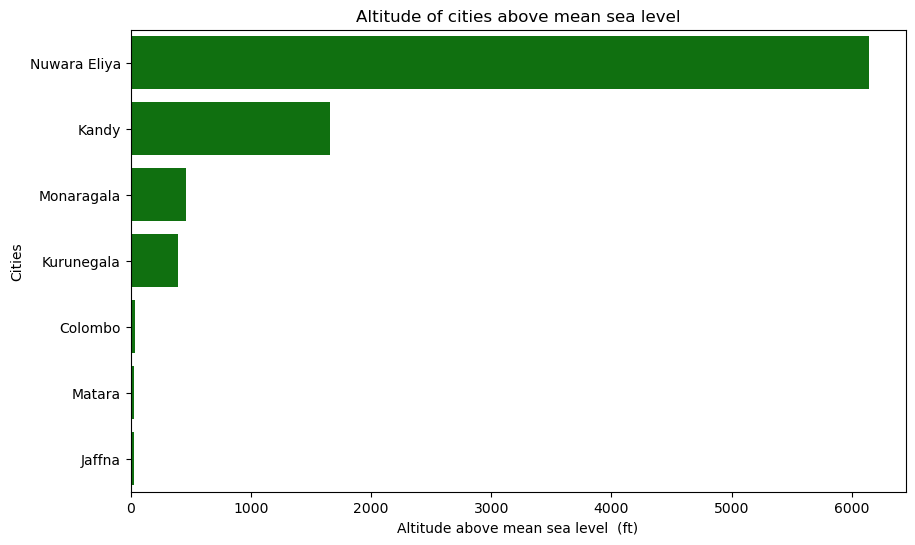

In [114]:
plt.figure(figsize=(10,6))
cities = ['Nuwara Eliya','Kandy','Monaragala','Kurunegala','Colombo','Matara','Jaffna']
altitude = [6139,1660,465,399,38,33,27]
sns.barplot(x=altitude, y=cities, color='green')
plt.title("Altitude of cities above mean sea level")
plt.ylabel("Cities")
plt.xlabel("Altitude above mean sea level  (ft)")
plt.show()

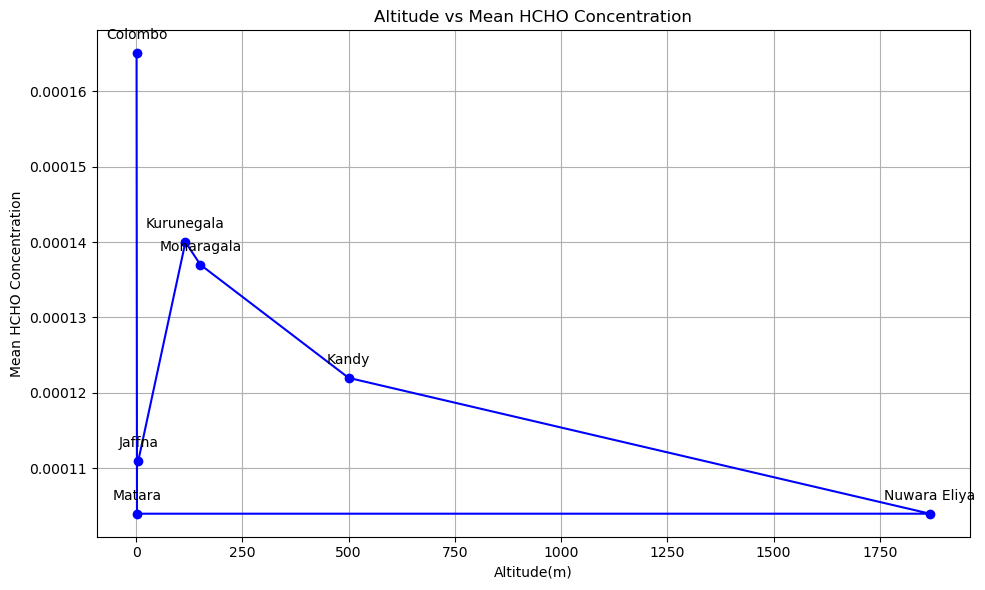

In [115]:
altitude = [1,2,1868,500,151,116,5]
mean_hcho = [0.000165, 0.000104, 0.000104, 0.000122, 0.000137, 0.00014, 0.000111]
cities = ['Colombo', 'Matara', 'Nuwara Eliya', 'Kandy', 'Monaragala', 'Kurunegala', 'Jaffna']

# plotting a line plot
plt.figure(figsize=(10,6))
plt.plot(altitude, mean_hcho, marker='o', color='blue', linestyle='-')
# marking the name of the cities on the plot
for i, city in enumerate(cities):
    plt.annotate(city, (altitude[i], mean_hcho[i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.title('Altitude vs Mean HCHO Concentration')
plt.xlabel('Altitude(m)')
plt.ylabel('Mean HCHO Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
altitude = [1,2,1868,500,151,116,5]
mean_hcho_levels = [0.000165, 0.000104, 0.000104, 0.000122, 0.000137, 0.00014, 0.000111]
cities = ['Colombo', 'Matara', 'Nuwara Eliya', 'Kandy', 'Monaragala', 'Kurunegala', 'Jaffna']
correlation = np.corrcoef(mean_hcho_levels,altitude)
print(f"Correlation between Altitude and mean HCHO levels: {correlation[0,1]}")

Correlation between Altitude and mean HCHO levels: -0.43771405703755784


Average Temperature For Each Month In Each Location

In [117]:
temperatures = [
    ["Location", "Month","Average Temperature(°C)"],
    ["Monaragala", "January", 21.2],
    ["Monaragala", "February", 21.9],
    ["Monaragala", "March", 23.3],
    ["Monaragala", "April", 23.9],
    ["Monaragala", "May", 23.9],
    ["Monaragala", "June", 23.8],
    ["Monaragala", "July", 23.8],
    ["Monaragala", "August", 23.7],
    ["Monaragala", "September", 23.4],
    ["Monaragala", "October", 22.8],
    ["Monaragala", "November", 22.0],
    ["Monaragala", "December", 21.1],
    ["Kurunegala", "January", 26.5],
    ["Kurunegala", "February", 27.2],
    ["Kurunegala", "March", 28.5],
    ["Kurunegala", "April", 29.0],
    ["Kurunegala", "May", 28.0],
    ["Kurunegala", "June", 28.6],
    ["Kurunegala", "July", 28.5],
    ["Kurunegala", "August", 28.3],
    ["Kurunegala", "September", 27.7],
    ["Kurunegala", "October", 27.4],
    ["Kurunegala", "November", 26.8],
    ["Kurunegala", "December", 26.2],
    ["Kandy", "January", 22.1],
    ["Kandy", "February", 23.0],
    ["Kandy", "March", 24.6],
    ["Kandy", "April", 24.7],
    ["Kandy", "May", 24.5],
    ["Kandy", "June", 23.9],
    ["Kandy", "July", 23.6],
    ["Kandy", "August", 23.5],
    ["Kandy", "September", 23.6],
    ["Kandy", "October", 23.4],
    ["Kandy", "November", 22.9],
    ["Kandy", "December", 22.4],
    ["Colombo", "January", 26.2],
    ["Colombo", "February", 26.9],
    ["Colombo", "March", 27.4],
    ["Colombo", "April", 27.3],
    ["Colombo", "May", 27.0],
    ["Colombo", "June", 26.7],
    ["Colombo", "July", 26.4],
    ["Colombo", "August", 26.3,],
    ["Colombo", "September", 26.2],
    ["Colombo", "October", 26.1],
    ["Colombo", "November", 25.8],
    ["Colombo", "December", 25.7],
    ["Matara", "January", 25.8],
    ["Matara", "February", 26.4],
    ["Matara", "March", 26.9],
    ["Matara", "April", 27.0],
    ["Matara", "May", 26.8],
    ["Matara", "June", 26.4],
    ["Matara", "July", 26.2],
    ["Matara", "August", 26.1],
    ["Matara", "September", 26.0],
    ["Matara", "October", 25.9],
    ["Matara", "November", 25.8],
    ["Matara", "December", 25.7],
    ["Nuwara Eliya", "January", 17.9],
    ["Nuwara Eliya", "February", 18.4],
    ["Nuwara Eliya", "March", 19.4],
    ["Nuwara Eliya", "April", 19.8],
    ["Nuwara Eliya", "May", 20.3],
    ["Nuwara Eliya", "June", 19.9],
    ["Nuwara Eliya", "July", 19.7],
    ["Nuwara Eliya", "August", 19.5],
    ["Nuwara Eliya", "September", 19.4],
    ["Nuwara Eliya", "October", 18.9],
    ["Nuwara Eliya", "November", 18.4],
    ["Nuwara Eliya", "December", 18.1],
    ["Jaffna", "January", 25.5],
    ["Jaffna", "February", 26.3],
    ["Jaffna", "March", 27.8],
    ["Jaffna", "April", 29.1],
    ["Jaffna", "May", 29.3],
    ["Jaffna", "June", 29.0],
    ["Jaffna", "July", 28.8],
    ["Jaffna", "August", 28.4],
    ["Jaffna", "September", 28.2],
    ["Jaffna", "October", 27.4],
    ["Jaffna", "November", 26.3],
    ["Jaffna", "December", 25.7]
]

temp_table = pd.DataFrame(temperatures[1:], columns=temperatures[0])


temp_table



,Location,Month,Average Temperature(°C)
0,Monaragala,January,21.2
1,Monaragala,February,21.9
2,Monaragala,March,23.3
3,Monaragala,April,23.9
4,Monaragala,May,23.9
...,...,...,...
79,Jaffna,August,28.4
80,Jaffna,September,28.2
81,Jaffna,October,27.4
82,Jaffna,November,26.3


In [118]:
combined['Month'] = combined['Present_Date'].dt.strftime('%B')
merged_df = pd.merge(combined, temp_table, on=['Location', 'Month'], how='inner')

# Display the merged DataFrame
print(merged_df)
merged_df.to_csv('merged_cleaned.csv', index=False)

      HCHO_Amount Location Present_Date  Next_Date     Month  \
0        0.000006   Matara   2019-01-02 2019-01-03   January   
1        0.000236   Matara   2019-01-03 2019-01-04   January   
2        0.000064   Matara   2019-01-04 2019-01-05   January   
3        0.000053   Matara   2019-01-05 2019-01-06   January   
4        0.000132   Matara   2019-01-06 2019-01-07   January   
...           ...      ...          ...        ...       ...   
7268     0.000116    Kandy   2023-12-07 2023-12-08  December   
7269     0.000261    Kandy   2023-12-11 2023-12-12  December   
7270     0.000114    Kandy   2023-12-21 2023-12-22  December   
7271     0.000116    Kandy   2023-12-23 2023-12-24  December   
7272     0.000056    Kandy   2023-12-30 2023-12-31  December   

      Average Temperature(°C)  
0                        25.8  
1                        25.8  
2                        25.8  
3                        25.8  
4                        25.8  
...                       ...  
7268   

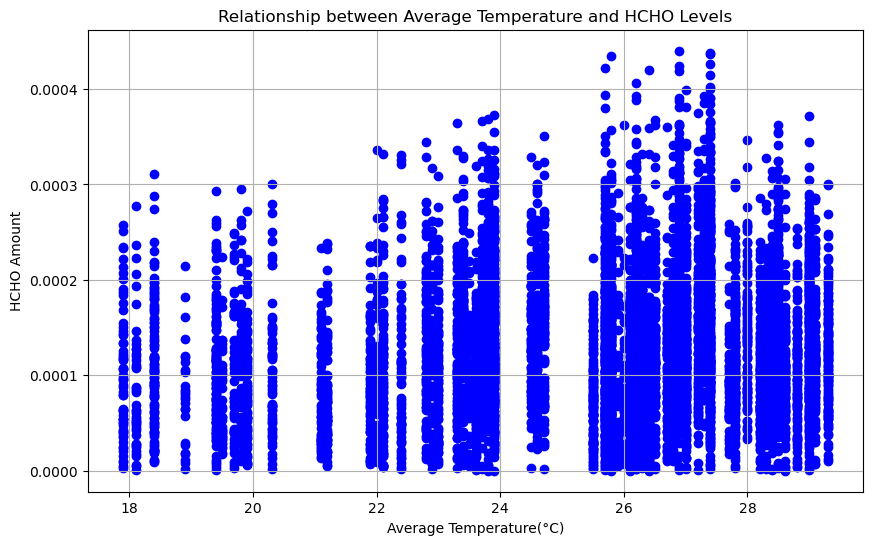

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Average Temperature(°C)'], merged_df['HCHO_Amount'], color='blue')
plt.title('Relationship between Average Temperature and HCHO Levels')
plt.xlabel('Average Temperature(°C)')
plt.ylabel('HCHO Amount')
plt.grid(True)
plt.show()

In [120]:
correlation = merged_df['HCHO_Amount'].corr(merged_df['Average Temperature(°C)'])

# Print the correlation coefficient
print("Correlation between HCHO level and Average Temperature:", correlation)

Correlation between HCHO level and Average Temperature: 0.11697372668285262


In [121]:
Unemployement_Rate = [
    ['Location', 'Year','Unemployment Rate'],
    ['Colombo', 2019, 4.1],
    ['Colombo', 2020, 4.8],
    ['Colombo', 2021, 4.4],
    ['Colombo', 2022, 5.1],
    ['Colombo', 2023, 5.5],
    ['Matara', 2019, 7.5],
    ['Matara', 2020, 8.6],
    ['Matara', 2021, 7.2],
    ['Matara', 2022, 5.2],
    ['Matara', 2023, 4.9],
    ['Nuwara Eliya', 2019, 4.2],
    ['Nuwara Eliya', 2020, 4.9],
    ['Nuwara Eliya', 2021, 3.7],
    ['Nuwara Eliya', 2022, 4.3],
    ['Nuwara Eliya', 2023, 4.5],
    ['Monaragala', 2019, 4.0],
    ['Monaragala', 2020, 6.5],
    ['Monaragala', 2021, 5.4],
    ['Monaragala', 2022, 3.9],
    ['Monaragala', 2023, 3.6],
    ['Kurunegala', 2019, 4.7],
    ['Kurunegala', 2020, 5.0],
    ['Kurunegala', 2021, 3.7],
    ['Kurunegala', 2022, 3.9],
    ['Kurunegala', 2023, 4.1],
    ['Jaffna', 2019, 6.0],
    ['Jaffna', 2020, 6.8],
    ['Jaffna', 2021, 4.7],
    ['Jaffna', 2022, 5.7],
    ['Jaffna', 2023, 5.9],
    ['Kandy', 2019, 6.6],
    ['Kandy', 2020, 7.5],
    ['Kandy', 2021, 6.8],
    ['Kandy', 2022, 6.7],
    ['Kandy', 2023, 7.0],
]

UNE_table = pd.DataFrame(Unemployement_Rate[1:], columns=Unemployement_Rate[0])

UNE_table

,Location,Year,Unemployment Rate
0,Colombo,2019,4.1
1,Colombo,2020,4.8
2,Colombo,2021,4.4
3,Colombo,2022,5.1
4,Colombo,2023,5.5
5,Matara,2019,7.5
6,Matara,2020,8.6
7,Matara,2021,7.2
8,Matara,2022,5.2
9,Matara,2023,4.9


In [122]:
merged_df['Year'] = merged_df['Present_Date'].dt.year
f_merged_df = pd.merge(merged_df, UNE_table, on=['Location', 'Year'], how='inner')

# Display the merged DataFrame
print(f_merged_df)
f_merged_df.to_csv('f_merged_cleaned.csv', index=False)

      HCHO_Amount Location Present_Date  Next_Date     Month  \
0        0.000006   Matara   2019-01-02 2019-01-03   January   
1        0.000236   Matara   2019-01-03 2019-01-04   January   
2        0.000064   Matara   2019-01-04 2019-01-05   January   
3        0.000053   Matara   2019-01-05 2019-01-06   January   
4        0.000132   Matara   2019-01-06 2019-01-07   January   
...           ...      ...          ...        ...       ...   
7268     0.000116    Kandy   2023-12-07 2023-12-08  December   
7269     0.000261    Kandy   2023-12-11 2023-12-12  December   
7270     0.000114    Kandy   2023-12-21 2023-12-22  December   
7271     0.000116    Kandy   2023-12-23 2023-12-24  December   
7272     0.000056    Kandy   2023-12-30 2023-12-31  December   

      Average Temperature(°C)  Year  Unemployment Rate  
0                        25.8  2019                7.5  
1                        25.8  2019                7.5  
2                        25.8  2019                7.5  
3  

In [123]:
correlation = f_merged_df['HCHO_Amount'].corr(f_merged_df['Unemployment Rate'])

# Print the correlation coefficient
print("Correlation between HCHO level and Unemployement Rate:", correlation)

Correlation between HCHO level and Unemployement Rate: -0.1205145635829582


Tree Cover lost due to forest fires 

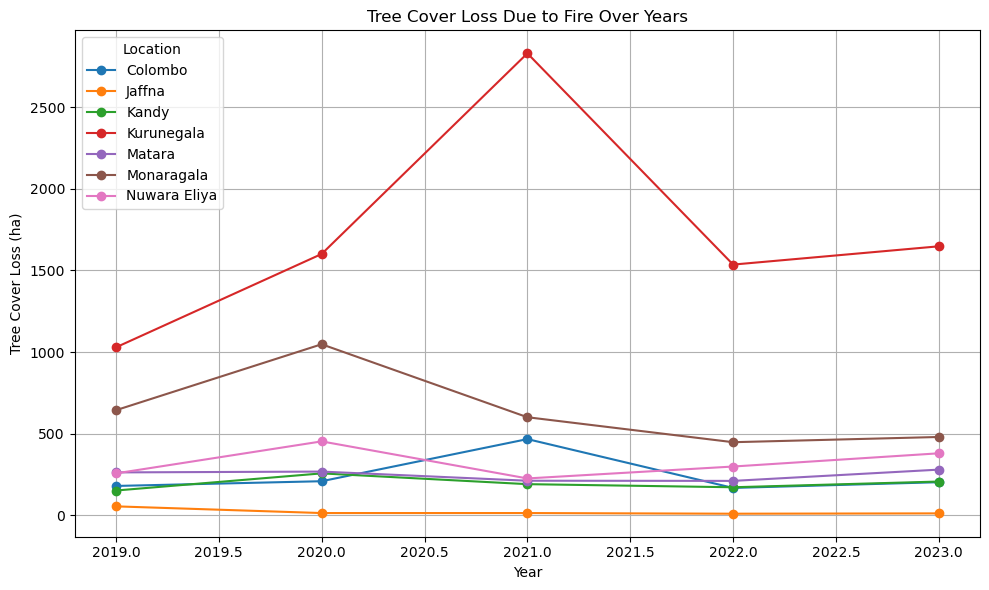

In [124]:
tree_cover_loss = [
    ['Location', 'Year','Tree Cover Loss (ha)'],
    ['Colombo', 2019, 180],
    ['Colombo', 2020, 209],
    ['Colombo', 2021, 467],
    ['Colombo', 2022, 168],
    ['Colombo', 2023, 203],
    ['Matara', 2019, 263],
    ['Matara', 2020, 268],
    ['Matara', 2021, 212],
    ['Matara', 2022, 211],
    ['Matara', 2023, 280],
    ['Nuwara Eliya', 2019, 257],
    ['Nuwara Eliya', 2020, 453],
    ['Nuwara Eliya', 2021, 226],
    ['Nuwara Eliya', 2022, 299],
    ['Nuwara Eliya', 2023, 380],
    ['Monaragala', 2019, 644],
    ['Monaragala', 2020, 1048],
    ['Monaragala', 2021, 601],
    ['Monaragala', 2022, 448],
    ['Monaragala', 2023, 480],
    ['Kurunegala', 2019, 1029],
    ['Kurunegala', 2020, 1601],
    ['Kurunegala', 2021, 2830],
    ['Kurunegala', 2022, 1536],
    ['Kurunegala', 2023, 1648],
    ['Jaffna', 2019, 55],
    ['Jaffna', 2020, 14],
    ['Jaffna', 2021, 14],
    ['Jaffna', 2022, 10],
    ['Jaffna', 2023, 12],
    ['Kandy', 2019, 152],
    ['Kandy', 2020, 257],
    ['Kandy', 2021, 191],
    ['Kandy', 2022, 172],
    ['Kandy', 2023, 207],
]


tree_cover_loss_df = pd.DataFrame(tree_cover_loss[1:], columns=tree_cover_loss[0])
tree_cover_loss_df

plt.figure(figsize=(10,6))
# Group by location and plot each group
for location, data in tree_cover_loss_df.groupby('Location'):
    plt.plot(data['Year'], data['Tree Cover Loss (ha)'], marker='o', label=location)
plt.title('Tree Cover Loss Due to Fire Over Years')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Location', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
f_merged_df['Year'] = f_merged_df['Present_Date'].dt.year
t_merged_df = pd.merge(f_merged_df, tree_cover_loss_df, on=['Location', 'Year'], how='inner')

# Display the merged DataFrame
print(t_merged_df)
t_merged_df.to_csv('f_merged_cleaned.csv', index=False)

      HCHO_Amount Location Present_Date  Next_Date     Month  \
0        0.000006   Matara   2019-01-02 2019-01-03   January   
1        0.000236   Matara   2019-01-03 2019-01-04   January   
2        0.000064   Matara   2019-01-04 2019-01-05   January   
3        0.000053   Matara   2019-01-05 2019-01-06   January   
4        0.000132   Matara   2019-01-06 2019-01-07   January   
...           ...      ...          ...        ...       ...   
7268     0.000116    Kandy   2023-12-07 2023-12-08  December   
7269     0.000261    Kandy   2023-12-11 2023-12-12  December   
7270     0.000114    Kandy   2023-12-21 2023-12-22  December   
7271     0.000116    Kandy   2023-12-23 2023-12-24  December   
7272     0.000056    Kandy   2023-12-30 2023-12-31  December   

      Average Temperature(°C)  Year  Unemployment Rate  Tree Cover Loss (ha)  
0                        25.8  2019                7.5                   263  
1                        25.8  2019                7.5                   

In [126]:
correlation = t_merged_df['HCHO_Amount'].corr(t_merged_df['Tree Cover Loss (ha)'])

# Print the correlation coefficient
print("Correlation between HCHO level and Unemployement Rate:", correlation)

Correlation between HCHO level and Unemployement Rate: 0.06973994042637172


Creating Dataframes for population density & altitude of the locations 

In [127]:
import pandas as pd 
cities = ['Colombo','Matara','Nuwara Eliya','Kandy','Monaragala','Kurunegala','Jaffna']
population_density = [13364,630,420,710,80,362,611]
altitude = [1,2,1868,500,151,116,5]

data = {
    'Location': cities,
    'Population Density (persons/km squared)': population_density,
    'Altitude (ft)': altitude
}

df = pd.DataFrame(data)

print(df)

       Location  Population Density (persons/km squared)  Altitude (ft)
0       Colombo                                    13364              1
1        Matara                                      630              2
2  Nuwara Eliya                                      420           1868
3         Kandy                                      710            500
4    Monaragala                                       80            151
5    Kurunegala                                      362            116
6        Jaffna                                      611              5


In [128]:
import os 

directory = 'Spatial_Temporal_Analysis'

if not os.path.exists(directory):
    os.mkdir(directory)

df.to_csv('Spatial_Temporal_Analysis/Altitude_Population.csv')